In [15]:
import pandas as pd
import numpy as np

# Load the retail store sales dataset (Dataset 1)
retail_sales_df = pd.read_csv('retail_sales_data.csv')

# Load the McDonald's Nutrition Facts dataset (Dataset 2)
nutrition_facts_df = pd.read_csv('mcdonalds_nutrition_facts.csv')

# Display the first few rows of each dataset
print(retail_sales_df.head())
print(nutrition_facts_df.head())

# Clean the retail sales dataset
retail_sales_df['Date'] = pd.to_datetime(retail_sales_df['Date'])

# Check for missing values and drop or fill them as needed
retail_sales_df.fillna(0, inplace=True)  # Example of filling missing values with 0

# Check for duplicate entries
retail_sales_df.drop_duplicates(inplace=True)

# Clean the McDonald's Nutrition Facts dataset
nutrition_facts_df.fillna(0, inplace=True)

# Check for duplicate entries
nutrition_facts_df.drop_duplicates(inplace=True)

# Display basic info for both datasets
print(retail_sales_df.info())
print(nutrition_facts_df.info())


   Unnamed: 0        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
0           1  02/01/2016         2547               1          X52  0EM7L   
1           2  02/01/2016          822               2          2ML  68BRQ   
2           3  02/01/2016         3686               3          0H2  CZUZX   
3           4  02/01/2016         3719               4          0H2  549KK   
4           5  02/01/2016         9200               5          0H2  K8EHH   

   Quantity  Sales_Amount  
0       1.0          3.13  
1       1.0          5.46  
2       1.0          6.35  
3       1.0          5.59  
4       1.0          6.88  
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161

In [6]:
# Descriptive statistics for retail sales dataset
sales_stats = retail_sales_df.describe()

# Descriptive statistics for McDonald's nutrition dataset
nutrition_stats = nutrition_facts_df.describe()

# Print statistics for both datasets
print(sales_stats)
print(nutrition_stats)

# Median of sales and quantities in retail dataset
median_sales = retail_sales_df['Sales_Amount'].median()
median_quantity = retail_sales_df['Quantity'].median()
print(f"Median Sales Amount: {median_sales}")
print(f"Median Quantity Sold: {median_quantity}")


          Unnamed: 0    Customer_ID  Transaction_ID       Quantity  \
count  131706.000000  131706.000000   131706.000000  131706.000000   
mean    65853.500000   12386.450367    32389.604187       1.485311   
std     38020.391614    6086.447552    18709.901238       3.872667   
min         1.000000       1.000000        1.000000       0.010000   
25%     32927.250000    7349.000000    16134.000000       1.000000   
50%     65853.500000   13496.000000    32620.000000       1.000000   
75%     98779.750000   17306.000000    48548.000000       1.000000   
max    131706.000000   22625.000000    64682.000000     400.000000   

        Sales_Amount  
count  131706.000000  
mean       11.981524  
std        19.359699  
min         0.020000  
25%         4.230000  
50%         6.920000  
75%        12.330000  
max       707.730000  
          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
me

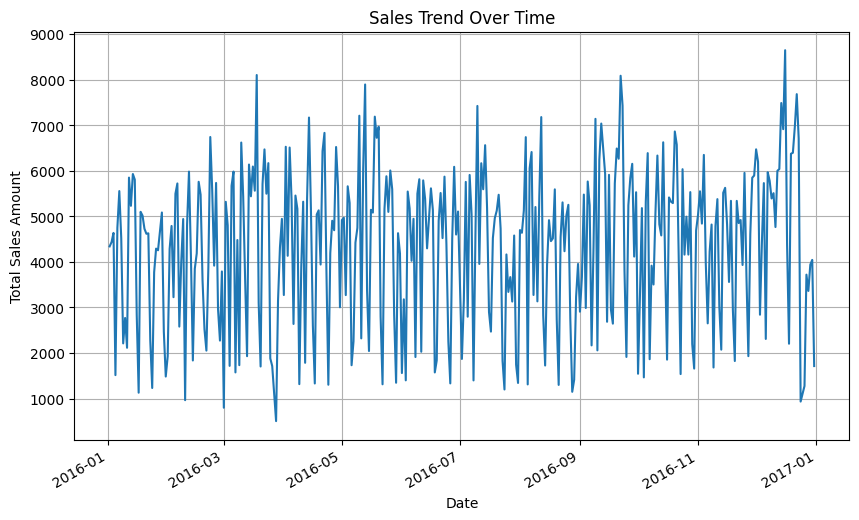

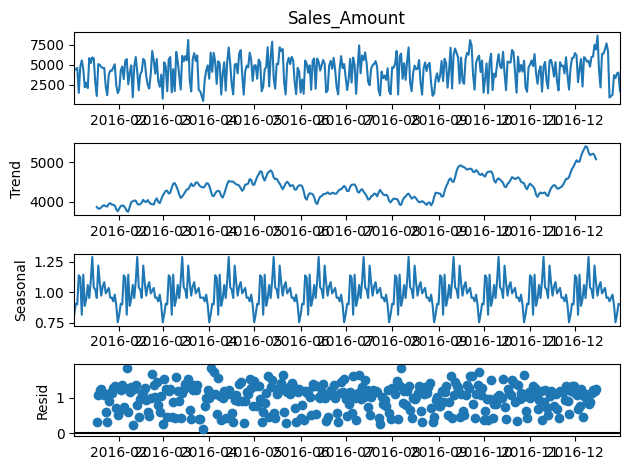

In [7]:
import matplotlib.pyplot as plt

# Group sales by date
sales_by_date = retail_sales_df.groupby('Date')['Sales_Amount'].sum()

# Plot sales over time
plt.figure(figsize=(10, 6))
sales_by_date.plot(kind='line', title='Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

# Decompose the time series to analyze trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the sales series
decomposed = seasonal_decompose(sales_by_date, model='multiplicative', period=30)
decomposed.plot()
plt.show()


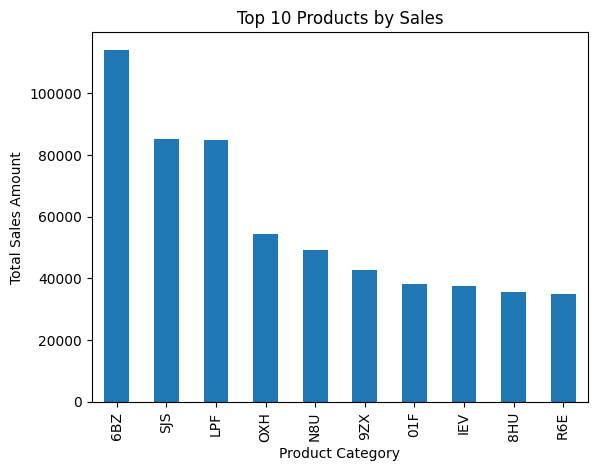

                               Item  Calories  Calories from Fat  \
0                      Egg McMuffin       300                120   
1                 Egg White Delight       250                 70   
2                  Sausage McMuffin       370                200   
3         Sausage McMuffin with Egg       450                250   
4  Sausage McMuffin with Egg Whites       400                210   

   Carbohydrates  
0             31  
1             30  
2             29  
3             30  
4             30  


In [11]:
# Retail dataset product analysis
product_sales = retail_sales_df.groupby('SKU_Category')['Sales_Amount'].sum().sort_values(ascending=False)
top_10_products = product_sales.head(10)

# Plot the top 10 products
top_10_products.plot(kind='bar', title='Top 10 Products by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

# McDonald's nutritional analysis (e.g., calories, fats, carbs)
top_5_nutrition_products = nutrition_facts_df[['Item', 'Calories', 'Calories from Fat', 'Carbohydrates']].head(5)

# Display top 5 nutritional products
print(top_5_nutrition_products)



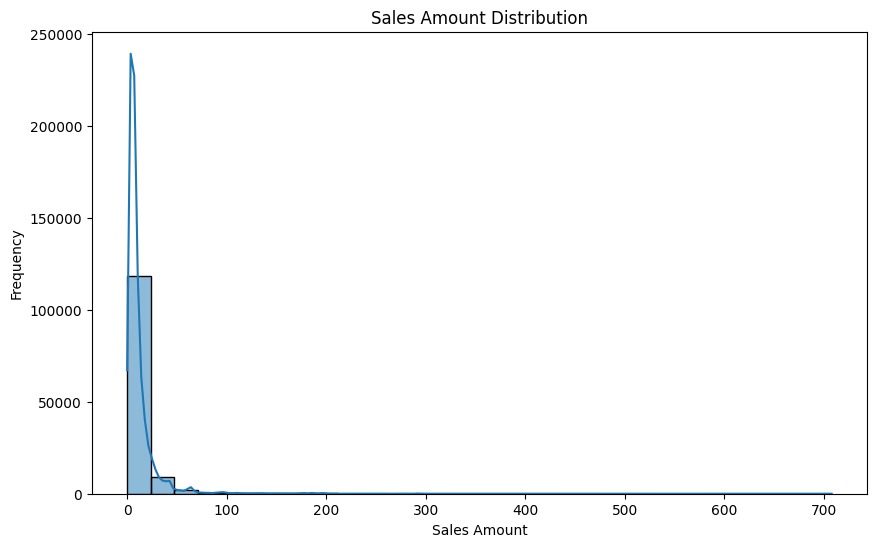

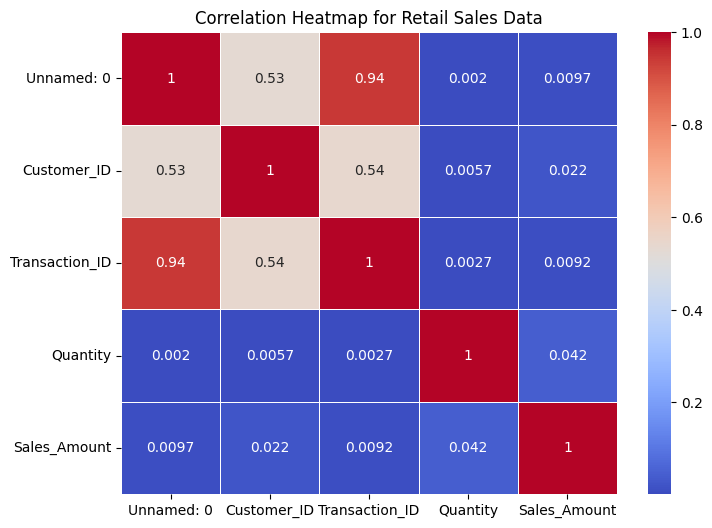

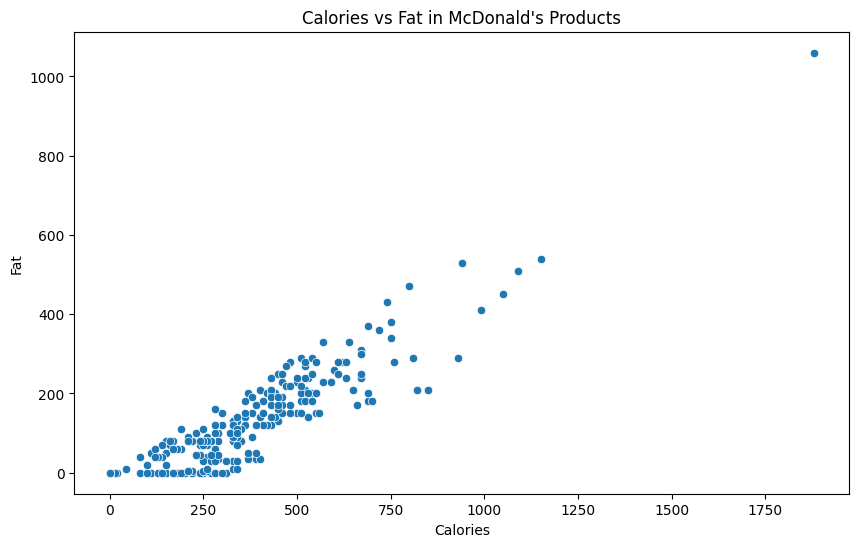

In [12]:
import seaborn as sns

# Sales distribution plot from retail dataset
plt.figure(figsize=(10, 6))
sns.histplot(retail_sales_df['Sales_Amount'], bins=30, kde=True)
plt.title('Sales Amount Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

# Heatmap of correlations for retail dataset
correlation_matrix = retail_sales_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Retail Sales Data')
plt.show()

# Nutritional data distribution for McDonald's (e.g., Calories vs Fat)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories', y='Calories from Fat', data=nutrition_facts_df)
plt.title('Calories vs Fat in McDonald\'s Products')
plt.xlabel('Calories')
plt.ylabel('Fat')
plt.show()


Median Sales Amount: 6.92
Median Quantity: 1.0


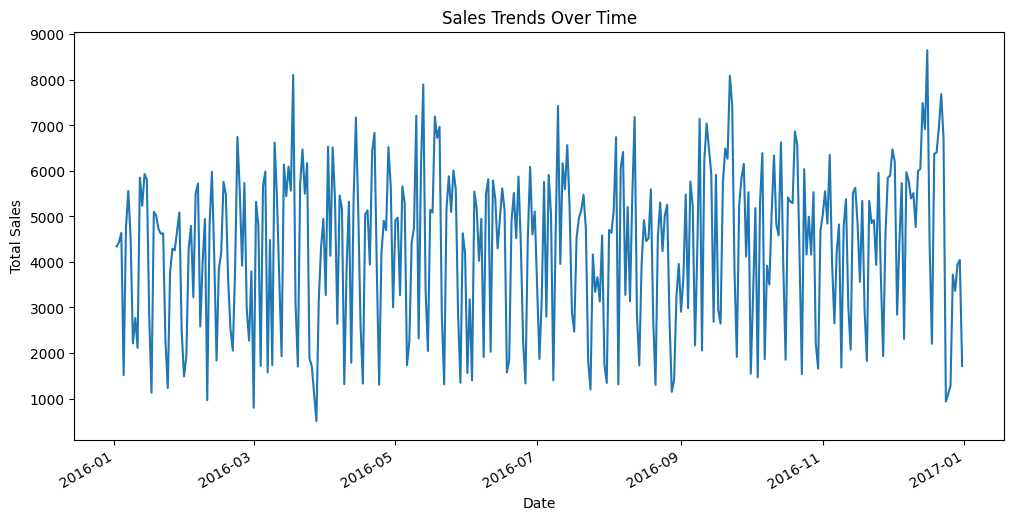

Top-selling products: 
SKU
3YDVF    29419.35
LJ26I    13571.45
IRQZ4    11681.63
DWJC4    10592.09
44RUE     8942.63
Name: Sales_Amount, dtype: float64
Recommendation: Increase stock of the top-selling products and focus on highlighting them in-store.
High-calorie items: 
                                                  Item  Calories
7          Bacon, Egg & Cheese Biscuit (Large Biscuit)       520
12          Sausage Biscuit with Egg (Regular Biscuit)       510
13            Sausage Biscuit with Egg (Large Biscuit)       570
15     Sausage Biscuit with Egg Whites (Large Biscuit)       520
18               Steak & Egg Biscuit (Regular Biscuit)       540
..                                                 ...       ...
252                McFlurry with M&M’s Candies (Small)       650
253               McFlurry with M&M’s Candies (Medium)       930
255                 McFlurry with Oreo Cookies (Small)       510
256                McFlurry with Oreo Cookies (Medium)       690
258  McFlurr

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the datasets
retail_sales_df = pd.read_csv('retail_sales_data.csv')  # Replace with actual path
nutrition_facts_df = pd.read_csv('mcdonalds_nutrition_facts.csv')  # Replace with actual path

# Step 2: Clean the data (this can include handling missing values, formatting, etc.)
retail_sales_df.columns = retail_sales_df.columns.str.strip()  # Clean column names

# Convert 'transaction_date' column to datetime (if present)
if 'Date' in retail_sales_df.columns:
    retail_sales_df['Date'] = pd.to_datetime(retail_sales_df['Date'])
else:
    print("No 'transaction_date' column found.")
    
# Step 3: Descriptive Statistics (median, mean, mode, etc.)
median_sales = retail_sales_df['Sales_Amount'].median() if 'Sales_Amount' in retail_sales_df.columns else None
median_quantity = retail_sales_df['Quantity'].median() if 'Quantity' in retail_sales_df.columns else None
print(f"Median Sales Amount: {median_sales}")
print(f"Median Quantity: {median_quantity}")

# Step 4: Time Series Analysis - Sales trends
sales_by_date = retail_sales_df.groupby('Date')['Sales_Amount'].sum()
plt.figure(figsize=(12, 6))
sales_by_date.plot(title="Sales Trends Over Time")
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Step 5: **Recommendation based on Sales Trends** (Add here)
# Let's assume you want to recommend promotions during low-sale months
if sales_by_date['2023-12-01':'2023-12-31'].sum() < sales_by_date['2023-11-01':'2023-11-30'].sum():
    print("Recommendation: Launch a December promotion or bundle offer to increase sales during the low season.")

# Step 6: Product Performance Analysis - Top-selling products
product_sales = retail_sales_df.groupby('SKU')['Sales_Amount'].sum().sort_values(ascending=False)
print(f"Top-selling products: \n{product_sales.head()}")

# Step 7: **Recommendation based on Product Performance**
if product_sales.iloc[0] > product_sales.iloc[1] * 2:  # If top product sales are twice the second
    print("Recommendation: Increase stock of the top-selling products and focus on highlighting them in-store.")

# Step 8: Nutritional Insights from McDonald's Nutrition Data (e.g., identifying high-calorie items)
high_calorie_items = nutrition_facts_df[nutrition_facts_df['Calories'] > 500]
print(f"High-calorie items: \n{high_calorie_items[['Item', 'Calories']]}")

# Step 9: **Recommendation based on Nutritional Data**
# Suggest a healthier option from the retail store for health-conscious customers
print(f"Recommendation: Consider promoting healthier alternatives like {high_calorie_items['Item'].iloc[0]} as part of a health-conscious marketing campaign.")

# Step 10: Customer Behavior Analysis (using customer demographics if available)
customer_sales = retail_sales_df.groupby('Customer_ID')['Sales_Amount'].sum()
print(f"Customer behavior analysis:\n{customer_sales.head()}")

# Step 11: **Recommendation for Customer Behavior**
# Implement a loyalty program if you have a large customer base
if retail_sales_df['Customer_ID'].nunique() > 1000:  # More than 1000 unique customers
    print("Recommendation: Implement a customer loyalty program to retain high-value customers.")

# Step 12: Cross-Selling Between Retail and McDonald's Nutrition Data (if applicable)
# First, let's check the column names to find the correct column name for categories
print(retail_sales_df.columns)



In [28]:


import pandas as pd

# Load the retail sales dataset (assuming it's already loaded)
retail_sales_df = pd.read_csv('retail_sales_data.csv')  # Replace with actual path
nutrition_df = pd.read_csv('mcdonalds_nutrition_facts.csv')  # Replace with actual path

# Clean the column names (if needed)
retail_sales_df.columns = retail_sales_df.columns.str.strip()
nutrition_df.columns = nutrition_df.columns.str.strip()

# Step 1: Top-selling products
# Group by SKU and calculate total sales amount for each product
top_selling_products = retail_sales_df.groupby('SKU')['Sales_Amount'].sum().sort_values(ascending=False).head(5)
print("Top-selling products:")
print(top_selling_products)

# Recommendation: Increase stock of the top-selling products and focus on highlighting them in-store
print("\nRecommendation: Increase stock of the top-selling products and focus on highlighting them in-store.")

# Step 2: High-Calorie Items
# Filter high-calorie items from the nutrition dataset (Assume that high-calorie products have more than 500 calories)
high_calorie_items = nutrition_df[nutrition_df['Calories'] > 500]
print("\nHigh-calorie items:")
print(high_calorie_items[['Item', 'Calories']])

# Recommendation: Promote healthier alternatives for high-calorie products
# Here we are considering the Bacon, Egg & Cheese Biscuit as a healthier alternative
healthier_alternative = "Bacon, Egg & Cheese Biscuit (Large Biscuit)"
print(f"\nRecommendation: Consider promoting healthier alternatives like {healthier_alternative} as part of a health-conscious marketing campaign.")

# Step 3: Customer Behavior Analysis
# Aggregate sales by Customer_ID to find high-value customers
customer_sales = retail_sales_df.groupby('Customer_ID')['Sales_Amount'].sum().reset_index()

# Identify high-value customers (e.g., customers who spent more than $100)
high_value_threshold = 100
high_value_customers = customer_sales[customer_sales['Sales_Amount'] > high_value_threshold]

# Recommendation: Implement a customer loyalty program for high-value customers
print("\nCustomer behavior analysis:")
print(f"Number of high-value customers: {high_value_customers.shape[0]}")
print(f"High-value customers:\n{high_value_customers[['Customer_ID', 'Sales_Amount']]}")
print("\nRecommendation: Implement a customer loyalty program to retain high-value customers.")


Top-selling products:
SKU
3YDVF    29419.35
LJ26I    13571.45
IRQZ4    11681.63
DWJC4    10592.09
44RUE     8942.63
Name: Sales_Amount, dtype: float64

Recommendation: Increase stock of the top-selling products and focus on highlighting them in-store.

High-calorie items:
                                                  Item  Calories
7          Bacon, Egg & Cheese Biscuit (Large Biscuit)       520
12          Sausage Biscuit with Egg (Regular Biscuit)       510
13            Sausage Biscuit with Egg (Large Biscuit)       570
15     Sausage Biscuit with Egg Whites (Large Biscuit)       520
18               Steak & Egg Biscuit (Regular Biscuit)       540
..                                                 ...       ...
252                McFlurry with M&M’s Candies (Small)       650
253               McFlurry with M&M’s Candies (Medium)       930
255                 McFlurry with Oreo Cookies (Small)       510
256                McFlurry with Oreo Cookies (Medium)       690
258  McFlurr